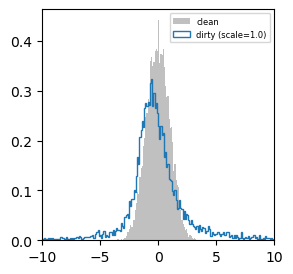

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from DynGenModels.datamodules.deconvolution.configs import Deconvolution_Gauss1D_Configs
from DynGenModels.datamodules.deconvolution.datasets import SimpleSmearedGaussDataset

configs = Deconvolution_Gauss1D_Configs()
gauss = SimpleSmearedGaussDataset(configs)

# plot distributions histograms

xlim=(-10,10)

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
plt.hist(gauss.truth, bins=np.arange(*xlim, 0.1), density=True, label='clean', color='silver')
plt.hist(gauss.smeared, bins=np.arange(*xlim, 0.1), density=True, label='dirty (scale={})'.format(gauss.scale), histtype='step')
ax.legend(fontsize=6)
plt.xlim(*xlim)
plt.show()

In [2]:

import torch
import numpy as np
import matplotlib.pyplot as plt 


from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.deconvolution_configs import Deconvolution_Gauss1D_MAF_RQS_NormFlow as Configs

configs = Configs(features = ['x'],
                  log_norm_scale = 1.0,
                  num_points = 20,
                  data_split_fracs = [1.0, 0.0, 0.0],
                  epochs = 5,
                  batch_size = 5,
                  lr = 1e-4,
                  num_transforms = 5,
                  dim_hidden = 128,
                  num_blocks = 3,
                  use_batch_norm = True,
                  num_bins  = 20,
                  tail_bound = 15.0,
                  num_mc_draws = 3
                  )

#...set working directory for results:

configs.set_workdir(path='../../results', save_config=True)

#...define setup and train model :

from DynGenModels.datamodules.deconvolution.datasets import SimpleSmearedGaussDataset 
from DynGenModels.datamodules.deconvolution.dataloader import ToysDataLoader 
from DynGenModels.models.nflow_nets import MAFPiecewiseRQS
from DynGenModels.dynamics.nf.deconvolution import DeconvolutionNormFlows

gauss = SimpleSmearedGaussDataset(configs)
dataloader = ToysDataLoader(gauss, configs)
net = MAFPiecewiseRQS(configs)
dynamics = DeconvolutionNormFlows(net, configs)
maf = DynGenModelTrainer(dynamics=dynamics, dataloader=dataloader, configs=configs)
maf.train()

#=============================================================================================
INFO: created directory: ../../results/Gauss1D.DeconvolutionNormFlow.MAF_RQS.2023.10.11_10h26
#=============================================================================================
+---------------------+-----------------------+
| Parameters          | Values                |
+---------------------+-----------------------+
| data_name           | Gauss1D               |
| log_norm_scale      | 1.0                   |
| num_points          | 20                    |
| dim_input           | 1                     |
| features            | ['x']                 |
| preprocess          | []                    |
| device              | cpu                   |
| data_split_fracs    | [1.0, 0.0, 0.0]       |
| batch_size          | 5                     |
| epochs              | 5                     |
| lr                  | 0.0001                |
| early_stopping      |                     

epochs:   0%|          | 0/5 [00:00<?, ?it/s]

1 tensor([0.2577, 5.9599, 0.1884, 0.2822, 1.0855]) tensor([-1.5542, -5.9770,  0.1670, -0.8610,  0.9835])
2 tensor([0.2577, 0.2577, 0.2577, 5.9599, 5.9599, 5.9599, 0.1884, 0.1884, 0.1884,
        0.2822, 0.2822, 0.2822, 1.0855, 1.0855, 1.0855]) tensor([-1.5542, -1.5542, -1.5542, -5.9770, -5.9770, -5.9770,  0.1670,  0.1670,
         0.1670, -0.8610, -0.8610, -0.8610,  0.9835,  0.9835,  0.9835])
3 tensor([ 1.8327,  0.8253,  0.0490, -0.0054, -0.1556, -0.2464,  0.4835,  0.6803,
        -0.3094, -0.5286, -0.6025,  1.7214,  1.0624,  1.0283, -1.0654])
4 tensor([ 0.4722,  0.2126,  0.0126, -0.0323, -0.9272, -1.4685,  0.0911,  0.1282,
        -0.0583, -0.1492, -0.1700,  0.4858,  1.1533,  1.1162, -1.1565])
5 tensor([-2.0264, -1.7669, -1.5669, -5.9447, -5.0498, -4.5085,  0.0760,  0.0389,
         0.2253, -0.7119, -0.6910, -1.3468, -0.1698, -0.1327,  2.1400])


ValueError: No dimension 1 in inputs.

In [7]:
A=torch.Tensor([[1,222,1],[1,2,1],[1,9,1]]) 
A.dim()

2